In [ ]:
import numpy as np
import sympy

#Função para cálculo da integral utilizando o método dos trapézios
def inttrap(x, fx):
  fxl = np.ones(len(x))
  fxl = fxl.flatten()
  h = x[1] - x[0]
  for i in range(len(x)):
    fxl[i] = fx.subs(y, x[i])

  integral = (h / 2) * (fxl[0] + fxl[1])

  return integral

#Função para cálculo da integral utilizando o método dos trapézios repetidos
def inttrapeziorep(x, fx, n):
  m = n+1
  fxl = np.ones(m)
  fxl = fxl.flatten()
  h = float(x[1] - x[0])/n
  x = np.linspace(x[0],x[1],m)
  for i in range(m):
    fxl[i] = fx.subs(y, x[i])

  integral = (h/2)*(fxl[0] + 2*sum(fxl[1:m-1]) + fxl[m-1])
  return integral

#Função para cálculo da integral utilizando a regra de 1/3 de Simpson
def intsimpson(x, fx):
  xl = np.ones(len(x) + 1)
  xl = xl.flatten()
  h = (x[1] - x[0]) / 2
  xmed = x[0] + h

  for i in range(len(x) + 1):
    if i == 1:
      xl[i] = xmed
    elif i == 0:
      xl[i] = x[i]
    else:
      xl[i] = x[-1]

  fxl = np.ones(len(xl))
  fxl = fxl.flatten()
  for i in range(len(xl)):
    fxl[i] = fx.subs(y, xl[i])

  integral = (h / 3) * (fxl[0] + (4 * fxl[1]) + fxl[2])
  return integral

#Função para cálculo da integral utilizando a regra de 1/3 de Simpson repetida
def intsimpsonrep(x, fx, n):
  m = n+1
  fxl = np.ones(m)
  fxl = fxl.flatten()
  h = float(x[1] - x[0])/n
  x = np.linspace(x[0],x[1],m)
  for i in range(m):
    fxl[i] = fx.subs(y, x[i])

  integral = (h/3)*(fxl[0] + 2*sum(fxl[:m-2:2]) + 4*sum(fxl[1:m-1:2]) + fxl[m-1])
  return integral

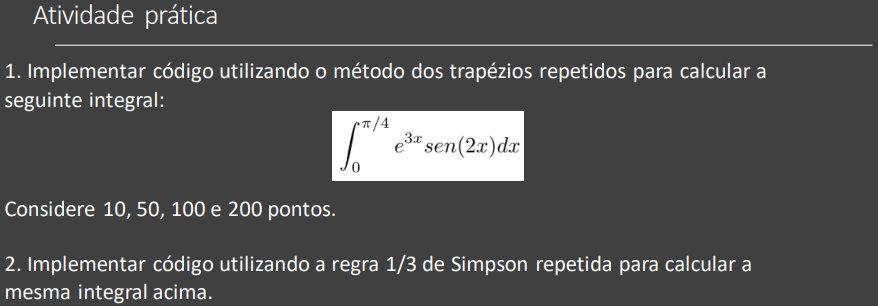

In [ ]:
import numpy as np
import sympy
from scipy import integrate

y = sympy.symbols('y')
x = [0.0, np.pi/4]
fx = (sympy.exp(3*y)) * (sympy.sin(2*y))
n = [10, 50, 100, 200]
f = lambda y: (np.exp(3*y)) * (np.sin(2*y))

inte, erroint = integrate.quad(f, 0.0, np.pi/4.0)

print('O valor da integral é %s, com precisão de %s' %(inte, erroint))
print('-&'*75)
for i in n:
  integral1 = inttrapeziorep(x, fx, i)
  integral2 = intsimpsonrep(x, fx, i)
  errotrapeziorep = integral1 - inte
  errosimpsonrep = integral2 - inte
  print('O valor da integral é %s, pelo método dos trapézios repetidos e utilizando %d pontos. ERRO = %s' %(integral1, i, errotrapeziorep))
  print('O valor da integral é %s, pela regra de 1/3 de Simpson repetida e utilizando %d pontos. ERRO = %s' %(integral2, i, errosimpsonrep))
  print('-'*150)

O valor da integral é 2.5886286325071755, com precisão de 2.8739551100133994e-14
-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&-&
O valor da integral é 2.6038784907897385, pelo método dos trapézios repetidos e utilizando 10 pontos. ERRO = 0.015249858282563089
O valor da integral é 2.588599828153961, pela regra de 1/3 de Simpson repetida e utilizando 10 pontos. ERRO = -2.8804353214617606e-05
------------------------------------------------------------------------------------------------------------------------------------------------------
O valor da integral é 2.589238342775839, pelo método dos trapézios repetidos e utilizando 50 pontos. ERRO = 0.0006097102686637434
O valor da integral é 2.5886285848957957, pela regra de 1/3 de Simpson repetida e utilizando 50 pontos. ERRO = -4.761137972764118e-08
-----------------------------------------------------------------------------------------